# Model regresji logistycznej na zbiorze danych `Cardiovascular Disease dataset` ze strony kaggle.com
## Link: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

In [2]:
import kagglehub

# Pobranie najnowszej wersji zestawu danych
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")

# Wyświetlenie ścieżki do pobranych plików
print("Path to dataset files:", path)


100%|██████████| 742k/742k [00:00<00:00, 32.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sulianova/cardiovascular-disease-dataset/versions/1


# Import bibliotek

W tej sekcji importujemy niezbędne biblioteki do analizy danych i budowy modelu.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

# Ustawienia dla wykresów
%matplotlib inline
sns.set_style('darkgrid')


# Wczytywanie i przygotowanie danych

W tej sekcji wczytujemy dane z pliku CSV i wykonujemy wstępne przetwarzanie danych, takie jak zmiana typu danych i usunięcie niepotrzebnych kolumn.

In [4]:
data = pd.read_csv('/root/.cache/kagglehub/datasets/sulianova/cardiovascular-disease-dataset/versions/1/cardio_train.csv', sep=';')

# Wyświetlenie pierwszych kilku wierszy oraz informacji o zbiorze danych
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
data['age'] = (data['age'] / 365).astype('int')

# Wyświetlenie przekształconych danych
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
5,8,60,1,151,67.0,120,80,2,2,0,0,0,0
6,9,60,1,157,93.0,130,80,3,1,0,0,1,0
7,12,61,2,178,95.0,130,90,3,3,0,0,1,1
8,13,48,1,158,71.0,110,70,1,1,0,0,1,0
9,14,54,1,164,68.0,110,60,1,1,0,0,0,0


In [7]:
data.drop('id', axis=1, inplace=True)

# Wyświetlenie danych po usunięciu kolumny `id`
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
X = data.drop('cardio', axis=1)  # Wszystkie kolumny poza 'cardio'
y = data['cardio']  # Kolumna docelowa (target)

# Standaryzacja danych

In [9]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

# Wyświetlenie pierwszych kilku wierszy przeskalowanych danych
X_scaled[:5]

array([[-0.41980002,  1.36405487,  0.44345206, -0.84787326, -0.12218198,
        -0.0882385 , -0.5393221 , -0.39571994, -0.31087913, -0.23838436,
         0.49416711],
       [ 0.31910983, -0.73310834, -1.01816804,  0.74983117,  0.07261016,
        -0.03517999,  2.40079294, -0.39571994, -0.31087913, -0.23838436,
         0.49416711],
       [-0.27201805, -0.73310834,  0.07804703, -0.70894244,  0.00767945,
        -0.14129701,  2.40079294, -0.39571994, -0.31087913, -0.23838436,
        -2.02360695],
       [-0.71536396,  1.36405487,  0.56525373,  0.54143494,  0.13754088,
         0.01787852, -0.5393221 , -0.39571994, -0.31087913, -0.23838436,
         0.49416711],
       [-0.86314593, -0.73310834, -1.01816804, -1.26466572, -0.18711269,
        -0.19435552, -0.5393221 , -0.39571994, -0.31087913, -0.23838436,
        -2.02360695]])

# Podział danych na zbiór treningowy i testowy

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

# Budowa, trenowanie i ocena modelu

W tej sekcji tworzymy model regresji logistycznej i trenujemy go na przygotowanych danych, następnie oceniamy jego wydajność na danych treningowych i testowych.

In [11]:
from sklearn.linear_model import LogisticRegression

# Tworzenie i trenowanie modelu
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Ocena modelu na zbiorze treningowym
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(f"Accuracy on the training set: {acc_log}%")

# Ocena modelu na zbiorze testowym
acc_log_test = round(logreg.score(X_test, y_test) * 100, 2)
print(f"Accuracy on the testing set: {acc_log_test}%")


Accuracy on the training set: 72.27%
Accuracy on the testing set: 72.14%


# Zapis i wczytywanie modelu

W tej sekcji zapisujemy wytrenowany model i skaler do pliku.

In [13]:
import pickle
from google.colab import drive

# Montowanie Google Drive
drive.mount('/content/drive')

# Ścieżki do zapisania modelu i skalera
model_path = '/content/drive/My Drive/Models/CVD/logreg_model.pkl'
scaler_path = '/content/drive/My Drive/Models/CVD/scaler.pkl'

# Zapisanie modelu i skalera
with open(model_path, 'wb') as file:
    pickle.dump(logreg, file)
with open(scaler_path, 'wb') as file:
    pickle.dump(ss, file)

Mounted at /content/drive


# Predykcja

W tej sekcji używamy wczytanego modelu do generowania predykcji dla nowych danych.

In [14]:
# Wczytanie modelu i skalera z Dysku Google
with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)
with open(scaler_path, 'rb') as file:
    loaded_scaler = pickle.load(file)

# Generowanie próbek danych
data_range = []
for age in range(20, 81, 5):  # Wiek od 20 do 80 lat, co 5 lat
    data_range.append([age, 1, 170, 70, 120, 80, 1, 1, 0, 0, 1])

# Przekształcenie do tablicy NumPy
data_range = np.array(data_range)

# Skalowanie danych
scaled_data = loaded_scaler.transform(data_range)

# Prognozy przy użyciu wczytanego modelu
predictions = loaded_model.predict(scaled_data)

# Oddzielenie próbek z predykcją 1 (choroba serca) i 0 (brak choroby serca)
positive_predictions = data_range[predictions == 1]
negative_predictions = data_range[predictions == 0]

# Wyświetlenie wyników
print("Positive Predictions (Model returned 1):")
print(positive_predictions)

print("\nNegative Predictions (Model returned 0):")
print(negative_predictions)

Positive Predictions (Model returned 1):
[[ 65   1 170  70 120  80   1   1   0   0   1]
 [ 70   1 170  70 120  80   1   1   0   0   1]
 [ 75   1 170  70 120  80   1   1   0   0   1]
 [ 80   1 170  70 120  80   1   1   0   0   1]]

Negative Predictions (Model returned 0):
[[ 20   1 170  70 120  80   1   1   0   0   1]
 [ 25   1 170  70 120  80   1   1   0   0   1]
 [ 30   1 170  70 120  80   1   1   0   0   1]
 [ 35   1 170  70 120  80   1   1   0   0   1]
 [ 40   1 170  70 120  80   1   1   0   0   1]
 [ 45   1 170  70 120  80   1   1   0   0   1]
 [ 50   1 170  70 120  80   1   1   0   0   1]
 [ 55   1 170  70 120  80   1   1   0   0   1]
 [ 60   1 170  70 120  80   1   1   0   0   1]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Macierz pomyłek

W tej sekcji generujemy i wizualizujemy macierz pomyłek dla modelu.

Confusion Matrix:
[[6798 2022]
 [2853 5827]]


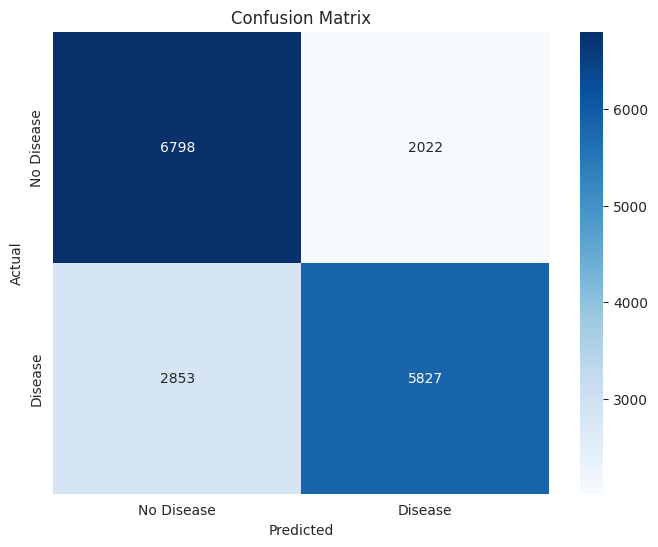

In [15]:
# Predykcja na zbiorze testowym
y_pred = logreg.predict(X_test)

# Obliczanie macierzy pomyłek
conf_matrix = confusion_matrix(y_test, y_pred)

# Wyświetlanie macierzy pomyłek
print("Confusion Matrix:")
print(conf_matrix)

# Wizualizacja macierzy pomyłek za pomocą Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()